In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

%config InlineBackend.figure_formats = ['svg']
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'

__Задача 1__

О непрерывной равномерно распределённой случайной величине `B` известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины `B` и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

In [2]:
sigma = 0.2
a = 0.5

Если распределение нормальное, то я могу решить задачу следующим способом:

Возьмем формулу дисперсии для равномерного распределения:
$$M(X) = \dfrac{a + b}{2}, \:\: D(X) = \dfrac{(b - a)^2}{12}.$$
Выразим b через дисперсию:
$$b = \sqrt{12 D(X)} + a$$
Если распределение нормальное, то:
$$D(X) = \sigma^2$$
Соответственно:
$$b = 2\sigma\sqrt{3} + a$$

In [4]:
b = 2*sigma*3**0.5 + a
print('Правая граница:', b)

Правая граница: 1.192820323027551


In [7]:
print('Среднее значение:', (a + b)/2)

Среднее значение: 0.8464101615137755


__Задача 2__

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

_Подсказка_. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.

In [13]:
x_avg = 1.06
p_x = 0.05
x = 1

In [39]:
i = 0.03
while True:
    cdf = stats.norm.cdf(x=x, loc=x_avg, scale = i)
    if cdf >= p_x:
        print(f'Получили {round(cdf, 5)}% коробок со средним квадр. откл. = {round(i, 5)}')
        
        break
    i += 0.00003

Получили 0.05001% коробок со средним квадр. откл. = 0.03648


In [43]:
m = 1.1
p_m = 1 - stats.norm.cdf(x=m, loc=x_avg, scale = i)
print('Процент коробок, имеющих массу больше 1.1 кг =', p_m)

Процент коробок, имеющих массу больше 1.1 кг = 0.13643193002222542


__Задача 3__

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

In [44]:
sum_candy = 30
a = 12 * sum_candy
b = 14 * sum_candy

In [55]:
# Посчитаем ср. квадр. откл. и дисперсию
disp = ((b - a) ** 2) / 12
loc = (a + b) / 2
print(loc, disp)

390.0 300.0


In [51]:
n_samples = 10 ** 4
def get_mean_samples_uniform(n: int) -> np.ndarray:
    """Возвращает выборку из значений среднего от `n` равномерно распределённых
    случайных величин.
    """
    
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

In [53]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

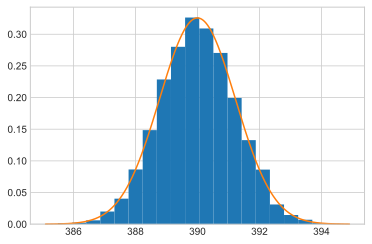

In [59]:
n = 200

scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

### Найдем вероятность с помощью определения соотношения площадей под графиком:
Думаю, правильней решить эту задачу интегралом, но не до конца понимаю, как это сделать в данном случае. 

In [89]:
sqr_390 = 0
sqr_395 = 0
sqr_380 = 0
sqr_full = 0
for x in ox:
    z = pdf_normal(loc, scale, x) * x
    sqr_full += z
    if x<390:
        sqr_390 += z
    if x>395:
        sqr_395 += z
    if 400>x>380:
        sqr_380 += z
        
print('Вероятность, что масса коробки: \nа) меньше 390 граммов =', sqr_390/sqr_full)
print('б) больше 395 граммов =', sqr_395/sqr_full)
print('в) от 380 до 400 граммов =', sqr_380/sqr_full)

Вероятность, что масса коробки: 
а) меньше 390 граммов = 0.4987475052769976
б) больше 395 граммов = 0.0
в) от 380 до 400 граммов = 1.0


__Задача 4__ (на подумать)

Каким образом связаны между собой понятие квантиля и правила двух и трёх сигм? 

Данное задание - на подумать, оформлять его не обязательно. Этот вопрос мы обсудим в начале следующего занятия.

#### Правило двух сигм говорит о том, что с вероятностью около 95% значения попадут в данный интервал.
#### Сам интервал можно при этом выразить через квантили, т.е. указать такое X, при котором вероятность < 2.5%, и такое X, при котором вероятность больше 97,5%. Все, что останется, будет соответстовать вероятности 95%